# Projective toric varieties in Oscar

In this notebook, we illustrate some of the functionalities of 'Oscar.jl' related to projective toric varieties. In particular, we construct toric varieties from polytopes. Documentation can be found at

https://oscar-system.github.io/Oscar.jl/dev/ToricVarieties/NormalToricVarieties/.

This is based on a notebook kindly shared with me by Lars Kastner. 



In [ ]:
using Pkg; Pkg.add("Oscar")
Pkg.develop(path=raw"/Users/Telen/Documents/Projects/Oscar.jl")
using Oscar

We first construct a hexagon $P$ as the convex hull of its vertices.

In [42]:
P = convex_hull([0 0; 1 0; 2 1; 2 2; 1 2; 0 1])
vertices(P)

6-element SubObjectIterator{PointVector{Polymake.Rational}}:
 [0, 0]
 [1, 0]
 [2, 1]
 [2, 2]
 [1, 2]
 [0, 1]

In [43]:
facets(P)

6-element SubObjectIterator{AffineHalfspace}:
 The Halfspace of R^2 described by
1: -x₁ ≦ 0

 The Halfspace of R^2 described by
1: -x₂ ≦ 0

 The Halfspace of R^2 described by
1: -x₁ + x₂ ≦ 1

 The Halfspace of R^2 described by
1: x₁ - x₂ ≦ 1

 The Halfspace of R^2 described by
1: x₁ ≦ 2

 The Halfspace of R^2 described by
1: x₂ ≦ 2


Here's how to visualize it.

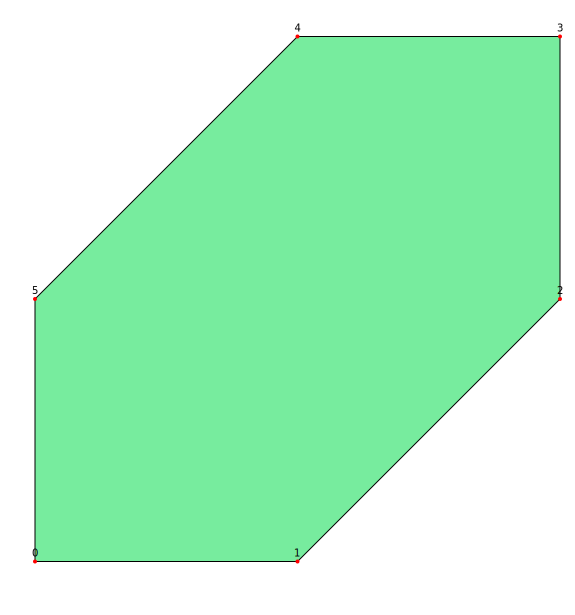

In [44]:
visualize(P)

We now construct the corresponding projective toric variety $X$:

In [45]:
X = NormalToricVariety(P)

A normal toric variety corresponding to a polyhedral fan in ambient dimension 2

By construction, $X$ is a normal projective variety (as the command name suggests). Its affine pieces are encoded in the normal fan $\Sigma$ of $P$.

In [46]:
Σ = normal_fan(P)

A polyhedral fan in ambient dimension 2

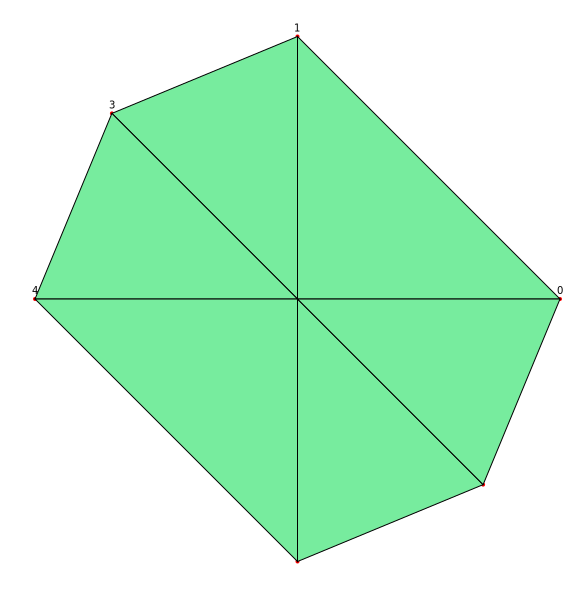

In [47]:
visualize(Σ)

$X$ is covered by affine toric varieties corresponding to the two-dimensional cones in the normal fan. 

In [48]:
Us = affine_open_covering(X)

6-element Vector{AffineNormalToricVariety}:
 A normal toric variety corresponding to a polyhedral fan in ambient dimension 2
 A normal toric variety corresponding to a polyhedral fan in ambient dimension 2
 A normal toric variety corresponding to a polyhedral fan in ambient dimension 2
 A normal toric variety corresponding to a polyhedral fan in ambient dimension 2
 A normal toric variety corresponding to a polyhedral fan in ambient dimension 2
 A normal toric variety corresponding to a polyhedral fan in ambient dimension 2

In [49]:
rays(cone(Us[2]))

2-element SubObjectIterator{RayVector{Polymake.Rational}}:
 [0, 1]
 [-1, 1]

In [50]:
maxcones = collect(maximal_cones(Σ))
σ = maxcones[2]
rays(σ)

2-element SubObjectIterator{RayVector{Polymake.Rational}}:
 [0, 1]
 [-1, 1]

In [51]:
issmooth(Us[2])

true

Here is how to check some properties of $X$: 

In [52]:
issimplicial(X)

true

In [53]:
issmooth(X)

true

In [54]:
dim(X)

2

We check that the polytope $P$ is normal (like all polygons)

In [55]:
isnormal(P)

true

This means that $X$ is projectively normal: the affine cone over $X$ is the normal toric variety with semigroup algebra $\text{Cone}(\hat{\cal A}) \cap \mathbb{Z}^3$, where $\hat{\cal A}$ is obtained by appending a coordinate 1 to the lattice points ${\cal A} = P \cap \mathbb{Z}^2$.

In [56]:
Â = hcat([vcat(p,1) for p ∈ lattice_points(P)]...)'

7×3 adjoint(::Matrix{Polymake.Integer}) with eltype Polymake.Integer:
 0  0  1
 2  1  1
 1  2  1
 1  0  1
 1  1  1
 0  1  1
 2  2  1

In [57]:
σⱽ = positive_hull(Â)

A polyhedral cone in ambient dimension 3

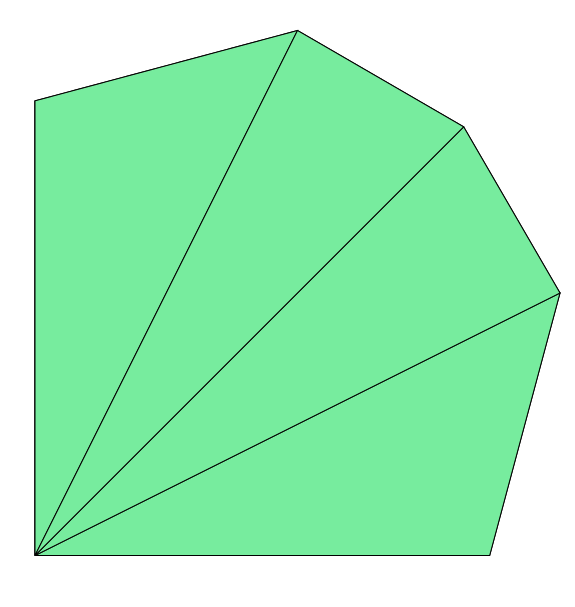

In [58]:
visualize(σⱽ)

In [59]:
σ = Cone(Polymake.polytope.polarize(σⱽ.pm_cone))
J1 = toric_ideal(AffineNormalToricVariety(σ))

ideal(-x_{1}*x_{7} + x_{3}*x_{6}, -x_{1}*x_{7} + x_{5}^2, x_{3}*x_{5} - x_{4}*x_{7}, x_{2}*x_{5} - x_{6}*x_{7}, x_{1}*x_{5} - x_{4}*x_{6}, -x_{1}*x_{7} + x_{2}*x_{4}, x_{2}*x_{3} - x_{5}*x_{7}, x_{1}*x_{3} - x_{4}*x_{5}, x_{1}*x_{2} - x_{5}*x_{6}, -x_{1}^2*x_{7} + x_{4}*x_{5}*x_{6}, -x_{1}^3*x_{7} + x_{4}^2*x_{6}^2)

In [60]:
hilbert_basis(σⱽ)

7-element SubObjectIterator{PointVector{Polymake.Integer}}:
 [2, 1, 1]
 [1, 2, 1]
 [0, 0, 1]
 [1, 0, 1]
 [1, 1, 1]
 [2, 2, 1]
 [0, 1, 1]

In [61]:
binomial_exponents = σⱽ.pm_cone.CONE_TORIC_IDEAL.BINOMIAL_GENERATORS

pm::Matrix<long>
-1 -1 0 0 1 1 0
-1 0 -1 1 1 0 0
-1 0 0 0 2 0 -1
-1 0 0 1 -1 1 0
-1 0 1 0 0 1 -1
-1 1 0 1 0 0 -1
-1 1 1 0 1 0 -2
-1 2 2 0 0 0 -3
0 -1 -1 0 1 0 1
0 -1 0 0 -1 1 1
0 0 -1 1 -1 0 1


In [62]:
I1 = binomial_exponents_to_ideal(binomial_exponents)
I1 == J1

true

Alternatively, we can compute the toric ideal from $\hat{\cal A}$. Note that the variables may be ordered differently.

In [63]:
I2 = toric_ideal(Â)

ideal(-x_{1}*x_{7} + x_{2}*x_{6}, -x_{1}*x_{7} + x_{5}^2, x_{3}*x_{5} - x_{6}*x_{7}, x_{2}*x_{5} - x_{4}*x_{7}, x_{1}*x_{5} - x_{4}*x_{6}, -x_{1}*x_{7} + x_{3}*x_{4}, x_{2}*x_{3} - x_{5}*x_{7}, x_{1}*x_{3} - x_{5}*x_{6}, x_{1}*x_{2} - x_{4}*x_{5}, -x_{1}^2*x_{7} + x_{4}*x_{5}*x_{6}, -x_{1}^3*x_{7} + x_{4}^2*x_{6}^2)

In [64]:
A = hcat(lattice_points(P)...)'

7×2 adjoint(::Matrix{Polymake.Integer}) with eltype Polymake.Integer:
 0  0
 2  1
 1  2
 1  0
 1  1
 0  1
 2  2

In [65]:
toric_ideal(A[1:end,:])

ideal(x_{1} - 1, -x_{3} + x_{5}*x_{6}, x_{4}*x_{6} - x_{5}, x_{2}*x_{6} - x_{7}, x_{5}^2 - x_{7}, -x_{2} + x_{4}*x_{5}, x_{3}*x_{5} - x_{6}*x_{7}, x_{2}*x_{5} - x_{4}*x_{7}, -x_{2}*x_{6} + x_{3}*x_{4}, x_{2}*x_{3} - x_{5}*x_{7}, -x_{3}^2 + x_{6}^2*x_{7}, -x_{2}^2 + x_{4}^2*x_{7})

In [66]:
P.pm_polytope.EHRHART_POLYNOMIAL

PropertyValue wrapping pm::UniPolynomial<pm::Rational, long>
3*x^2 + 3*x + 1

In [67]:
polarize(σ)

A polyhedral cone in ambient dimension 3

In [68]:
issimple(P)

LoadError: MethodError: no method matching issimple(::Polyhedron)
[0mClosest candidates are:
[0m  issimple([91m::Type{AnticNumberField}[39m) at /Users/telen/.julia/packages/Hecke/ye5vG/src/NumField/NfAbs/NfAbs.jl:28
[0m  issimple([91m::AnticNumberField[39m) at /Users/telen/.julia/packages/Hecke/ye5vG/src/NumField/NfAbs/NfAbs.jl:30
[0m  issimple([91m::NfAbsNS[39m) at /Users/telen/.julia/packages/Hecke/ye5vG/src/NumField/NfAbs/NonSimple.jl:187
[0m  ...